In [6]:
from IPython.display import display, Image
from langgraph.graph import END, StateGraph

from typing_extensions import TypedDict
from typing import List, TypedDict

## dummy functions for comprehensive visualization

class PlanExecute:
    question: str

class AffiliateAgent:
    def __init__(self):
        pass
    
    def fetch_all_urls(self, state: PlanExecute):
        pass
    
    def fetch_page_content(self, state: PlanExecute):
        pass
    
    def parse_product_details(self, state: PlanExecute):
        pass

    def store_product_in_db(self, state: PlanExecute):
        pass

    def search_database(self, state: PlanExecute):
        pass

    def scrape_and_store(self, state: PlanExecute):
        pass

    def handle_user_query(self, state: PlanExecute):
        pass

In [7]:
class UserAgent:
    def __init__(self):
        pass

    def create_user_table(self, state: PlanExecute):
        pass

    def insert_user_data(self, state: PlanExecute):
        pass

    def update_user_search_history(self, state: PlanExecute):
        pass

    def get_user_data(self, state: PlanExecute):
        pass

    def get_user_search_history(self, state: PlanExecute):
        pass

    def get_user_search_results(self, state: PlanExecute):
        pass

class SocialMedia:
    def __init__(self):
        pass

    def fetch_user_profile(self, state: PlanExecute):
        pass

    def fetch_user_posts(self, state: PlanExecute):
        pass

    def social_media_message_event(self, state: PlanExecute):
        pass
    
    def post_social_media(self, state: PlanExecute):
        pass
    

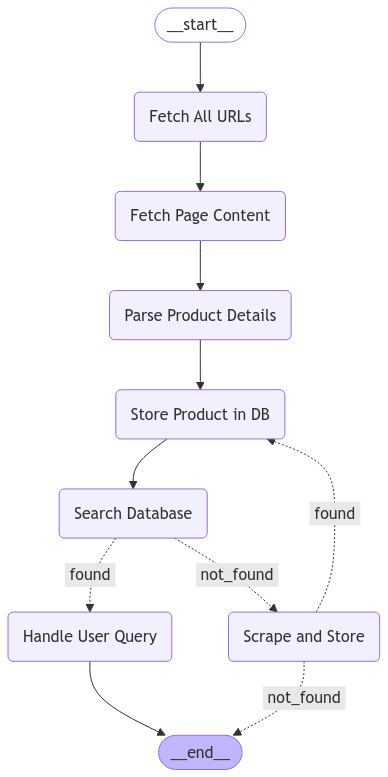

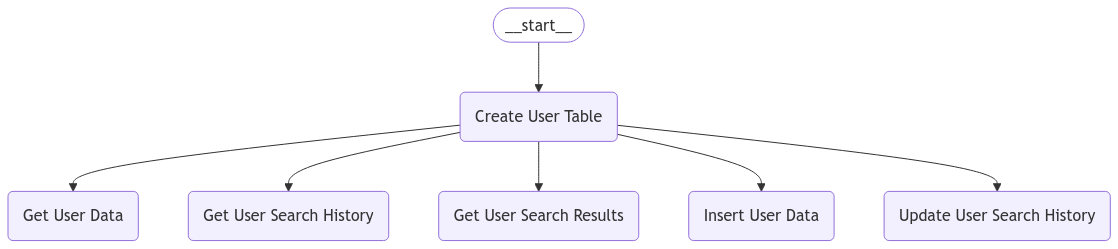

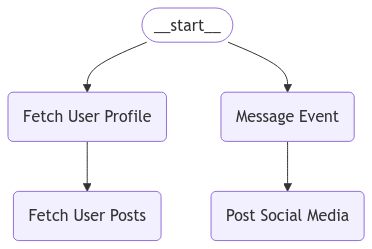

In [8]:
# Create workflows
affiliate_agent_workflow = StateGraph(PlanExecute)
user_agent_workflow = StateGraph(PlanExecute)
social_media_workflow = StateGraph(PlanExecute)
combined_workflow = StateGraph(PlanExecute)

affiliate_agent = AffiliateAgent()
user_agent = UserAgent()
social_media = SocialMedia()

# Add nodes to affiliate_agent_workflow
affiliate_agent_workflow.add_node("Fetch All URLs", affiliate_agent.fetch_all_urls)
affiliate_agent_workflow.add_node("Fetch Page Content", affiliate_agent.fetch_page_content)
affiliate_agent_workflow.add_node("Parse Product Details", affiliate_agent.parse_product_details)
affiliate_agent_workflow.add_node("Store Product in DB", affiliate_agent.store_product_in_db)
affiliate_agent_workflow.add_node("Search Database", affiliate_agent.search_database)
affiliate_agent_workflow.add_node("Scrape and Store", affiliate_agent.scrape_and_store)
affiliate_agent_workflow.add_node("Handle User Query", affiliate_agent.handle_user_query)

# Add nodes to user_agent_workflow
user_agent_workflow.add_node("Create User Table", user_agent.create_user_table)
user_agent_workflow.add_node("Insert User Data", user_agent.insert_user_data)
user_agent_workflow.add_node("Update User Search History", user_agent.update_user_search_history)
user_agent_workflow.add_node("Get User Data", user_agent.get_user_data)
user_agent_workflow.add_node("Get User Search History", user_agent.get_user_search_history)
user_agent_workflow.add_node("Get User Search Results", user_agent.get_user_search_results)

# Add nodes to social_media_workflow
social_media_workflow.add_node("Fetch User Profile", social_media.fetch_user_profile)
social_media_workflow.add_node("Fetch User Posts", social_media.fetch_user_posts)
social_media_workflow.add_node("Message Event", social_media.social_media_message_event)
social_media_workflow.add_node("Post Social Media", social_media.post_social_media)

# Set entry point for affiliate_agent_workflow
affiliate_agent_workflow.set_entry_point("Fetch All URLs")
affiliate_agent_workflow.add_edge("Fetch All URLs", "Fetch Page Content")
affiliate_agent_workflow.add_edge("Fetch Page Content", "Parse Product Details")
affiliate_agent_workflow.add_edge("Parse Product Details", "Store Product in DB")
affiliate_agent_workflow.add_edge("Store Product in DB", "Search Database")

affiliate_agent_workflow.add_conditional_edges(
    "Search Database",
    affiliate_agent.search_database,
    {
        "found": "Handle User Query",
        "not_found": "Scrape and Store"
    }
)

affiliate_agent_workflow.add_conditional_edges(
    "Scrape and Store",
    affiliate_agent.scrape_and_store,
    {
        "found": "Store Product in DB",
        "not_found": END
    }
)
affiliate_agent_workflow.add_edge("Handle User Query", END)


# Set entry point for user_agent_workflow
user_agent_workflow.set_entry_point("Create User Table")
user_agent_workflow.add_edge("Create User Table", "Insert User Data")
user_agent_workflow.add_edge("Create User Table", "Update User Search History")
user_agent_workflow.add_edge("Create User Table", "Get User Data")
user_agent_workflow.add_edge("Create User Table", "Get User Search History")
user_agent_workflow.add_edge("Create User Table", "Get User Search Results")
# user_agent_workflow.add_edge("Get User Search History", "Search Database")

# Set entry point for social_media_workflow
social_media_workflow.set_entry_point("Fetch User Profile")
social_media_workflow.add_edge("Fetch User Profile", "Fetch User Posts")
social_media_workflow.set_entry_point("Message Event")
social_media_workflow.add_edge("Message Event", "Post Social Media")

# You can now run the workflows independently or integrate them as needed.
# Compile the workflows
affiliate_plan_app = affiliate_agent_workflow.compile()
user_plan_app = user_agent_workflow.compile()
social_media_app = social_media_workflow.compile()

# Display the workflows as mermaid graphs
display(Image(affiliate_plan_app.get_graph(xray=True).draw_mermaid_png()))
display(Image(user_plan_app.get_graph(xray=True).draw_mermaid_png()))
display(Image(social_media_app.get_graph(xray=True).draw_mermaid_png()))


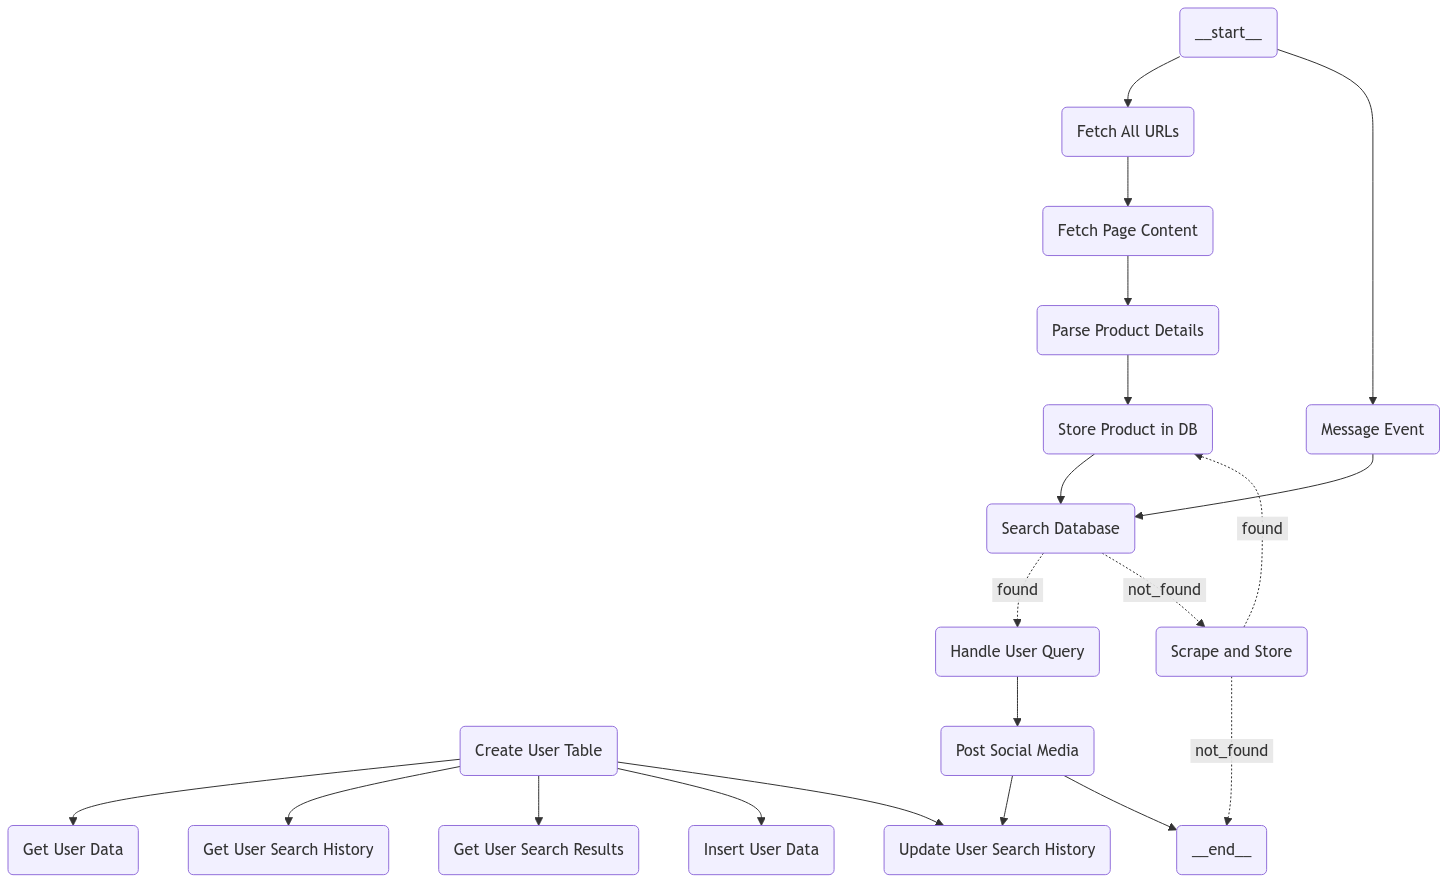

In [9]:
# Create workflows
combined_workflow = StateGraph(PlanExecute)

affiliate_agent = AffiliateAgent()
user_agent = UserAgent()
social_media = SocialMedia()

# Add nodes to affiliate_agent_workflow
combined_workflow.add_node("Fetch All URLs", affiliate_agent.fetch_all_urls)
combined_workflow.add_node("Fetch Page Content", affiliate_agent.fetch_page_content)
combined_workflow.add_node("Parse Product Details", affiliate_agent.parse_product_details)
combined_workflow.add_node("Store Product in DB", affiliate_agent.store_product_in_db)
combined_workflow.add_node("Search Database", affiliate_agent.search_database)
combined_workflow.add_node("Scrape and Store", affiliate_agent.scrape_and_store)
combined_workflow.add_node("Handle User Query", affiliate_agent.handle_user_query)

# Add nodes to user_agent_workflow
combined_workflow.add_node("Create User Table", user_agent.create_user_table)
combined_workflow.add_node("Insert User Data", user_agent.insert_user_data)
combined_workflow.add_node("Update User Search History", user_agent.update_user_search_history)
combined_workflow.add_node("Get User Data", user_agent.get_user_data)
combined_workflow.add_node("Get User Search History", user_agent.get_user_search_history)
combined_workflow.add_node("Get User Search Results", user_agent.get_user_search_results)

# Add nodes to social_media_workflow
# combined_workflow.add_node("Fetch User Profile", social_media.fetch_user_profile)
# combined_workflow.add_node("Fetch User Posts", social_media.fetch_user_posts)
combined_workflow.add_node("Message Event", social_media.social_media_message_event)
combined_workflow.add_node("Post Social Media", social_media.post_social_media)


# Set entry point for affiliate_agent_workflow
combined_workflow.set_entry_point("Fetch All URLs")
combined_workflow.add_edge("Fetch All URLs", "Fetch Page Content")
combined_workflow.add_edge("Fetch Page Content", "Parse Product Details")
combined_workflow.add_edge("Parse Product Details", "Store Product in DB")
combined_workflow.add_edge("Store Product in DB", "Search Database")

combined_workflow.add_conditional_edges(
    "Search Database",
    affiliate_agent.search_database,
    {
        "found": "Handle User Query",
        "not_found": "Scrape and Store"
    }
)

combined_workflow.add_conditional_edges(
    "Scrape and Store",
    affiliate_agent.scrape_and_store,
    {
        "found": "Store Product in DB",
        "not_found": END
    }
)
# combined_workflow.add_edge("Handle User Query", END)


# Set entry point for user_agent_workflow
# combined_workflow.set_entry_point("Create User Table")
combined_workflow.add_edge("Create User Table", "Insert User Data")
combined_workflow.add_edge("Create User Table", "Update User Search History")
combined_workflow.add_edge("Create User Table", "Get User Data")
combined_workflow.add_edge("Create User Table", "Get User Search History")
combined_workflow.add_edge("Create User Table", "Get User Search Results")
# combined_workflow.add_edge("Get User Search History", "Search Database")

# Set entry point for social_media_workflow
# combined_workflow.set_entry_point("Fetch User Profile")
# combined_workflow.set_entry_point("Fetch User Posts")
combined_workflow.set_entry_point("Message Event")
combined_workflow.add_edge("Message Event", "Search Database")
combined_workflow.add_edge("Handle User Query", "Post Social Media")
combined_workflow.add_edge("Post Social Media", "Update User Search History")
combined_workflow.add_edge("Post Social Media", END)

# You can now run the workflows independently or integrate them as needed.
# Compile the workflows
affiliate_plan_app = combined_workflow.compile()
# user_plan_app = user_agent_workflow.compile()
# social_media_app = social_media_workflow.compile()

# Display the workflows as mermaid graphs
display(Image(affiliate_plan_app.get_graph(xray=True).draw_mermaid_png()))
# display(Image(user_plan_app.get_graph(xray=True).draw_mermaid_png()))
# display(Image(social_media_app.get_graph(xray=True).draw_mermaid_png()))


In [12]:
affiliate_plan_app.invoke({"question": "hi"})

TypeError: PlanExecute() takes no arguments